In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open("styles/style-table.css").read() + open('styles/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [21]:
threemonth_metrics = pd.DataFrame.from_csv("raw_data/three-month-export_2016-04-04.csv")
threemonth_metrics.head()

,release_date,downloads__april,downloads__march,downloads__february,downloads__total
item_title,,,,,
TBP50 - Not Giving a Good Got Damn,2016-04-04 10:24:41,114,0,0,114
TBP49 - Welterweight Gold,2016-03-31 10:47:53,330,253,0,583
"TBP48 - Inertia, My Friend!",2016-03-27 18:30:33,27,460,0,487
TBP47 - Bottoms Up 4,2016-03-20 05:09:56,13,399,0,412
TBP46 - The Fundamental Conflict,2016-03-13 19:10:34,10,637,0,647


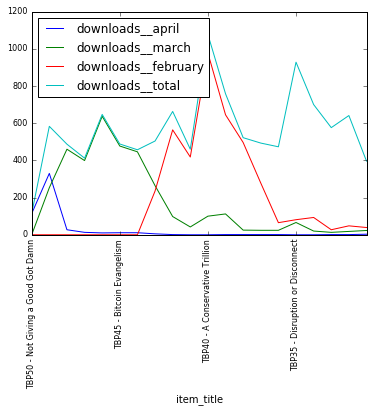

In [19]:
metrics[0:20].plot(rot=90, fontsize=8)

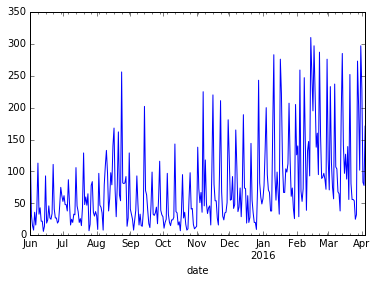

In [77]:
daily_metrics = pd.DataFrame.from_csv("raw_data/daily-totals_2016-04-04.csv")
daily_metrics.total_downloads.plot()